Expanding on [M. C. Arnesen, S. Bose, and V. Vedral - " "Natural Thermal and Magnetic Entanglement in the 1D Heisenberg Model". Phys. Rev. Let. vol. 87 (2001)]

In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import matplotlib as mpl

from Hamiltonians import Hamiltonians
from Entanglement import Entanglement

mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['figure.frameon'] = True
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['font.size'] = 20
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = False

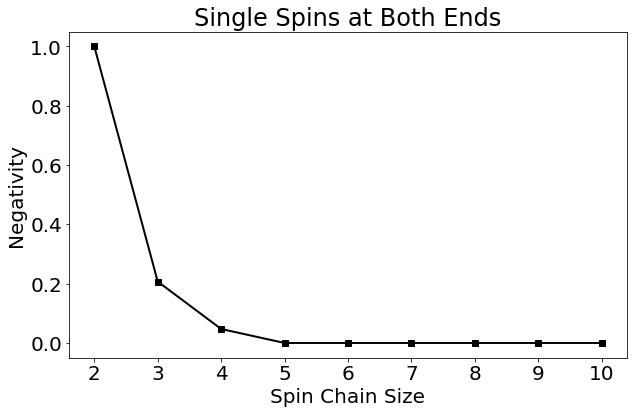

In [2]:
def ground_state():
    gamma = 0
    J = 1
    B = 0

    Nrange = [2,3,4,5,6,7,8,9,10]
    negativity = []

    for N in Nrange:
        hams = Hamiltonians(N=N)

        H = hams.XY_hamiltonian(gamma=gamma, J=J, B=B)

        ent = Entanglement()
        
        GS = ent.ground_state(H)
        rho = ket2dm(GS)

        ent = Entanglement()
        pac = ent.get_partial_trace(rho=rho, num_spins=[1, N-2, 1], trace_out_sys='b')
        pac_ta = ent.get_partial_transpose(rho=pac, mask=[1, 0], method="sparse")
        negativity.append(ent.negativity(pac_ta))

    plt.plot(Nrange, negativity, 's-', color='k')
    plt.xlabel('Spin Chain Size')
    plt.ylabel('Negativity')
    plt.title('Single Spins at Both Ends')
    plt.show()

if __name__=='__main__':
    ground_state()

In [19]:
from scipy.sparse.linalg import eigs
def ground_state(H=[]):
    Ene, Vec = eigs(H,2)
    GS = Vec[:,1]
    return Qobj(GS, type='Ket')

def thermal_state(H=[], T=1, K=1, sys='b', dims=[]):
    ent = Entanglement()

    dimA = dims[0]
    dimB = dims[1]
    dimC = dims[2]

    beta = 1/(K*T)
    Ene, Vec = eigs(H)

    Z = np.sum(np.exp(-Ene * beta))
    Prob = (1/Z) * np.exp(-Ene * beta)

    thermal = np.zeros((dimA*dimC, dimA*dimC), dtype='float')
    thermal = Qobj(thermal, dims=[[2,2], [2,2]])

    for num in range(0,len(Ene)):
        psi = Qobj(Vec[:,num], type='ket')
        rho = ket2dm(psi)
        rho_tr = ent.get_partial_trace(rho=rho, num_spins=[1, N-2, 1], trace_out_sys='b')
        thermal = thermal + Prob[num]*rho_tr
    return thermal

In [2]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import matplotlib as mpl

from Hamiltonians import Hamiltonians
from Entanglement import Entanglement

mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['figure.frameon'] = True
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['font.size'] = 20
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = False

def run_thermal_state_sweep():

    gamma = 0
    J = 1
    B = 0

    negativity = []
    N = 3

    hams = Hamiltonians(N=N)
    H = hams.XY_hamiltonian(gamma=gamma, J=J, B=B)

    ent = Entanglement()
    dims = [2,2,2]
    tvec = np.arange(0.1,2.1,0.1)

    negativity = []
    for t in tvec:
        rho_th = ent.thermal_state(H=H, T=t, K=1, sys='b', N=N, dims=dims)
        print(rho_th.shape)
        pac_ta = ent.get_partial_transpose(rho=rho_th, mask=[1, 0], method="sparse")
        negativity.append(ent.negativity(pac_ta))

    plt.plot(tvec, negativity, 's-', color='k')
    plt.xlabel('T/J')
    plt.ylabel('Negativity')
    # plt.title('Single Spins at Both Ends')
    plt.show()
    
if __name__=='__main__':
    run_thermal_state_sweep()

TypeError: get_partial_trace() got an unexpected keyword argument 'num_spins'

In [11]:
from qutip import *

tensor(identity(2), identity(2)).shape > (1, 1)

False

In [17]:
N = 3
ham = Hamiltonians(N)
heis = ham.heisenberg_interaction()

heis.all() == heis.H.all()

True

In [63]:
from scipy.sparse import csr_matrix, eye, kron

J = 1
N = 3


sx = csr_matrix((np.matrix('0 1; 1 0')), dtype=float)
sy = csr_matrix((np.matrix('0 -1j; 1j 0')), dtype=float)
sz = csr_matrix((np.matrix('1 0; 0 -1')), dtype=float)

H = csr_matrix((2**N, 2**N), dtype=np.float)

for num in range(0,N-1):
    H=H+(J*kron(eye(2**(num)),kron(sx,kron(sx,eye(2**(N-num-2)))))+\
        J*kron(eye(2**(num)),kron(sy,kron(sy,eye(2**(N-num-2)))))+\
        J*kron(eye(2**(num)),kron(sz,kron(sz,eye(2**(N-num-2))))) )

/Users/garethjones/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/coo.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  self.data = self.data.astype(dtype, copy=False)
/var/folders/lc/0pd94g0j0hx750lshn2s454r0000gn/T/ipykernel_9448/3805668750.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H = csr_matrix((2**N, 2**N), dtype=np.float)


In [69]:
sx = np.matrix('0 1; 1 0')
sy = np.matrix('0 -1j; 1j 0')
sz = np.matrix('1 0; 0 -1')

In [82]:
(sx*sy - sy*sx).all() == (2*1j*sz).all()

True

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0.+2.j 0.+0.j]
 [0.+0.j 0.-2.j]]

In [34]:
H = np.zeros((2**N,2**N));

for num in range(0,N-1):
    H=H+J*np.kron(np.eye(2**(num)),np.kron(sx,np.kron(sx,np.eye(2**(N-num-2)))))+\
        J*np.kron(np.eye(2**(num)),np.kron(sy,np.kron(sy,np.eye(2**(N-num-2)))))+\
        J*np.kron(np.eye(2**(num)),np.kron(sz,np.kron(sz,np.eye(2**(N-num-2)))));
H

matrix([[ 2.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
          0.+0.j],
        [ 0.+0.j,  0.+0.j,  2.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
          0.+0.j],
        [ 0.+0.j,  2.+0.j, -2.+0.j,  0.+0.j,  2.+0.j,  0.+0.j,  0.+0.j,
          0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  2.+0.j,  0.+0.j,
          0.+0.j],
        [ 0.+0.j,  0.+0.j,  2.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
          0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  2.+0.j,  0.+0.j, -2.+0.j,  2.+0.j,
          0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  2.+0.j,  0.+0.j,
          0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
          2.+0.j]])

In [83]:
!pip install quimb

     |████████████████████████████████| 353 kB 3.7 MB/s eta 0:00:01


In [90]:
from quimb import *
from quimb.tensor import *

In [103]:
H = MPO_ham_XY(L=300, j=1.0, bz=1.0, cyclic=False)
dmrg = DMRG2(H)

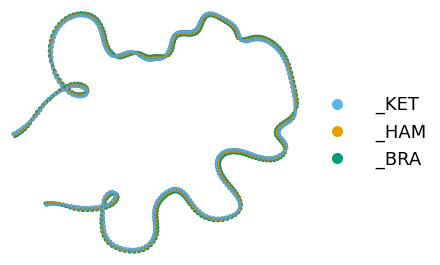

In [104]:
dmrg.TN_energy.draw(color=['_KET', '_HAM', '_BRA'])  # might be slow as uses force repulsion

In [106]:
dmrg.solve(max_sweeps=8, verbosity=1, cutoffs=1e-6)

SWEEP-5, direction=R, max_bond=(2/128), cutoff:1e-06


100%|########################################| 299/299 [00:01<00:00, 252.88it/s]

Energy: -149.9996271660109 ... not converged.
SWEEP-6, direction=R, max_bond=(2/256), cutoff:1e-06



100%|########################################| 299/299 [00:01<00:00, 248.99it/s]

Energy: -149.99969909129837 ... converged!


True

In [107]:
dmrg.energy

-149.99969909129837

In [108]:
dmrg.opts

{'default_sweep_sequence': 'R',
 'bond_compress_method': 'svd',
 'bond_compress_cutoff_mode': 'sum2',
 'bond_expand_rand_strength': 1e-06,
 'local_eig_tol': 0.001,
 'local_eig_ncv': 4,
 'local_eig_backend': None,
 'local_eig_maxiter': None,
 'local_eig_EPSType': None,
 'local_eig_ham_dense': None,
 'local_eig_norm_dense': None,
 'periodic_segment_size': 0.5,
 'periodic_compress_method': 'isvd',
 'periodic_compress_norm_eps': 1e-06,
 'periodic_compress_ham_eps': 1e-06,
 'periodic_compress_max_bond': -1,
 'periodic_nullspace_fudge_factor': 1e-12,
 'periodic_canonize_inv_tol': 1e-10,
 'periodic_orthog_tol': 1e-06}

In [111]:
gs = dmrg.state

In [112]:
rh0 = gs * gs.T

AttributeError: 'MatrixProductState' object has no attribute 'T'

In [115]:
from quimb import calc
calc.negativity(gs, dims=(2, 2), sysa=0)

TypeError: must be real number, not MatrixProductState

In [ ]:
gs.to_dense()